In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import utils

%load_ext autoreload
%autoreload 2


In [2]:
def load_anticipation(mousetrial):
    
    '''
    Load the data for a given mouse trial
    Inputs:
    mousetrial: string, the name of the mouse trial
    brainarea: string, the brain area to filter the cells
    celltype: string, the cell type to filter the cells
    '''
    
    #load time and head direction
    file = 'HdTuning_AnticipCorr.mat'
    
    data = sio.loadmat(mousetrial + '/' + file, struct_as_record=False, squeeze_me=True)
    
    lagVec = data.get('lagVec')
    hdinfo_lag = data.get('hdInfo_lag')
    
    peak_lag = []
    #get the peak lag for each cell
    for i in range(hdinfo_lag.shape[1]):
        lag = lagVec[hdinfo_lag[:,i].argmax()]
        peak_lag.append(lag)
        
    return peak_lag

### example

In [7]:
mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/Dataset_5/A1104-180328/Analysis/'

peak_lag  = load_anticipation(mousetrial)

### check all HD cells in ADN (Dataset_5)

In [10]:
# all folders in /home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/Dataset_5
dataset = 'Dataset_5'
folders = os.listdir('/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset)

adn_optimalshift = []

for folder in folders:
    mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset + '/' + folder + '/Analysis/'
    
    #load anticipation data
    peak_lag  = load_anticipation(mousetrial)
    
    mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset + '/' + folder + '/Data/'
    data = utils.load_data(mousetrial)
    t = data['t']
    angle_data = data['angle_data']
    brainarea = data['adn'] #adn = data['pos']
    hd = data['hd']
    
    for i in range(len(brainarea)):
        if brainarea[i] == 1 and hd[i] == 1: #it is a head direction cell in the target brain area
            adn_optimalshift.append(peak_lag[i])
            
    
    

### check all HD cells in PoS (Dataset_1)

In [8]:
# all folders in /home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/Dataset_5
dataset = 'Dataset_1'
folders = os.listdir('/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset)

pos_optimalshift = []

for folder in folders:
    mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset + '/' + folder + '/Analysis/'
    
    #load anticipation data
    peak_lag  = load_anticipation(mousetrial)
    
    mousetrial = '/home/zilong/Desktop/HDPhasePrecession/DuszkiewiczData/' + dataset + '/' + folder + '/Data/'
    data = utils.load_data(mousetrial)
    t = data['t']
    angle_data = data['angle_data']
    brainarea = data['pos'] #adn = data['pos']
    hd = data['hd']
    
    for i in range(len(brainarea)):
        if brainarea[i] == 1 and hd[i] == 1: #it is a head direction cell in the target brain area
            pos_optimalshift.append(peak_lag[i])
            
    
    

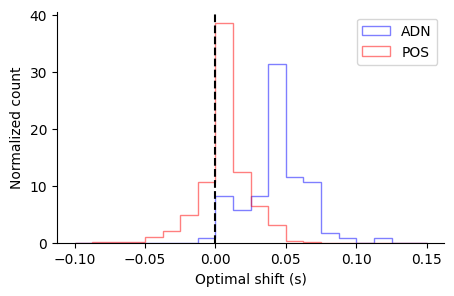

In [23]:
#plot the distribution of optimal shift in ADN and POS using normalized histogram
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

xrange = [-0.1, 0.15]
bins = 20

#only keeo histgram contours
ax.hist(adn_optimalshift, bins=bins, range=xrange, density=True, alpha=0.5, color='blue', label='ADN', histtype='step')
ax.hist(pos_optimalshift, bins=bins, range=xrange, density=True, alpha=0.5, color='red', label='POS', histtype='step')

#x=0 line
ax.axvline(x=0, color='black', linestyle='--')

ax.set_xlabel('Optimal shift (s)')
ax.set_ylabel('Normalized count')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()